<a href="https://colab.research.google.com/github/AlexAlexeyuk/Antibiotics-Streptococcus/blob/main/str_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import pandas as pd
import glob
import string
import nltk
import re
df = pd.read_csv('/content/drive/MyDrive/str/merge_final_1.csv')

In [ ]:
df.head()

,Unnamed: 0,Bensilpenicillin,Norfloxacin,Tetracycline,Erythromicine,Teicoplanine,Oxiciline,Cluster,Max_Platlets,Max_ESR,Max_Fibrinogen,Max_LDH,Max_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Diagnosis_y,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF_y,ALT,AST,Ab_ind,duration,Age,GFR
0,0,0.0,0,1.0,1.0,0,1,1,423.0,31.0,0.0,0.0,10.36,[123. 120.],0.000000,0.0,female,0.0,0.0,"цефтриаксон, левофлоксацин, амброксол, дексам...",клинический j180 внегоспитальная пневмония в н...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,25.4,22.9,0.0,13.0,52.0,inf
1,1,0.0,0,0.0,0.0,0,0,2,319.0,10.0,0.0,0.0,13.36,[154.],0.000000,0.0,male,0.0,0.0,"дексаметазон , эуфиллин , амброксол , аллеркап...",хобл бронхитический вариант легкой сиепени в с...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,12.0,0.0,13.0,48.0,inf
2,2,0.0,0,0.0,0.0,0,0,2,281.0,19.0,0.0,0.0,8.07,[142.],0.000000,0.0,male,20.6,20.6,"цефтриаксон , амброксол фт ,",внегоспитальная пневмония в вд справа средней ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,9.0,0.0,11.0,48.0,inf
3,3,1.0,1,0.0,1.0,0,1,3,270.0,12.0,103.0,0.0,10.39,[148. 158.],0.548673,62.0,female,8.0,8.0,"цефтриаксон , левофлоксацин , доксициклин",пневмонияв нижней доле слева средней степени т...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,13.0,0.0,11.0,49.0,110.580581
4,4,1.0,0,0.0,1.0,0,1,1,219.0,1.0,0.0,0.0,8.66,[173.],1.026549,116.0,male,6.0,6.0,"цефтриаксон, амброксол, метопролол, аспикард,...",пневмония двухсторонняя в нижних долях обоих л...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,17.0,23.0,0.0,4.0,83.0,70.866911


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        119 non-null    int64  
 1   Bensilpenicillin  119 non-null    float64
 2   Norfloxacin       119 non-null    int64  
 3   Tetracycline      119 non-null    float64
 4   Erythromicine     119 non-null    float64
 5   Teicoplanine      119 non-null    int64  
 6   Oxiciline         119 non-null    int64  
 7   Cluster           119 non-null    int64  
 8   Max_Platlets      119 non-null    float64
 9   Max_ESR           119 non-null    float64
 10  Max_Fibrinogen    119 non-null    float64
 11  Max_LDH           119 non-null    float64
 12  Max_Leucocytes    119 non-null    float64
 13  Hemoglobin        119 non-null    object 
 14  Max_Creatinine    119 non-null    float64
 15  Min_Cratinine     119 non-null    float64
 16  Gender            119 non-null    object 
 1

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ab=['Bensilpenicillin', 'Norfloxacin', 'Tetracycline',
       'Erythromicine', 'Teicoplanine', 'Oxiciline']


In [ ]:
df.columns

Index(['Unnamed: 0', 'Bensilpenicillin', 'Norfloxacin', 'Tetracycline',
       'Erythromicine', 'Teicoplanine', 'Oxiciline', 'Cluster', 'Max_Platlets',
       'Max_ESR', 'Max_Fibrinogen', 'Max_LDH', 'Max_Leucocytes', 'Hemoglobin',
       'Max_Creatinine', 'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP',
       'Treatment', 'Diagnosis_y', 'Pneumonia', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF_y', 'ALT', 'AST',
       'Ab_ind', 'duration', 'Age', 'GFR'],
      dtype='object')

In [ ]:
num_d = ['Max_Platlets', 'Max_ESR','Max_Fibrinogen',
         'Max_Leucocytes',   'Age',
          'Max_CRP']

In [ ]:
for ant in ab:
  df_r = df[df[ant] == 1]
  df_s = df[df[ant] == 0]
  for cat in num_d:
    lst1 = df_r[cat]
    lst2 = df_s[cat]
    shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
    shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
    if shapiro_test[1] < .05:
      print('Данные {0} распределены ненормально,\
            p-value - {1}'.format(cat,  shapiro_test[1]))
    if shapiro_test2[1] < .05:
      print('Данные {0} распределены ненормально,\
            p-value - {1}'.format(cat,  shapiro_test2[1]))
    else:
      pass

Данные Max_Platlets распределены ненормально,            p-value - 0.0020176509860903025
Данные Max_Platlets распределены ненормально,            p-value - 9.35551433940418e-05
Данные Max_ESR распределены ненормально,            p-value - 3.760817690885541e-20
Данные Max_Fibrinogen распределены ненормально,            p-value - 1.8124847326120297e-12
Данные Max_Fibrinogen распределены ненормально,            p-value - 4.613103425798082e-16
Данные Max_Leucocytes распределены ненормально,            p-value - 0.038579054176807404
Данные Max_Creatinine распределены ненормально,            p-value - 3.0513317597069545e-06
Данные Max_Creatinine распределены ненормально,            p-value - 5.806254999365934e-14
Данные Age распределены ненормально,            p-value - 0.002324093831703067
Данные Max_CRP распределены ненормально,            p-value - 1.8938377252197824e-05
Данные Max_CRP распределены ненормально,            p-value - 1.2535238892350496e-14
Данные Max_Platlets распределены н

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    В частности: показаны, не показаны антибиотики
    """
    res_mw = mannwhitneyu(lst_1, lst_2, 
                       use_continuity=True, 
                       alternative=None) # u -тест манна-уитни
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_mw[1], res_kw[1],  anova[1]


In [ ]:
for ant in ab:
  df_r = df[df[ant] == 1]
  df_s = df[df[ant] == 0]
  for cat in num_d:
    lst1 = df_r[cat]
    print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
      квартиль 75 - {3}\n '.format(cat,  lst1.median(), lst1.quantile(.25),
      lst1.quantile(.75) ))
    lst2 = df_s[cat]
    print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
      квартиль 75 - {3}\n '.format(cat,  lst2.median(), lst2.quantile(.25),
      lst2.quantile(.75) ))
    mw =  Basic_statistics(lst1, lst2)[0]
    kw =  Basic_statistics(lst1, lst2)[1]
    an =  Basic_statistics(lst1, lst2)[2]
    if mw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Манна-Уитни \n {2}'.format(cat,  mw, ant))
    if kw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Крускала-Уоллиса \n {2}'.format(cat,  kw, ant))
    if an < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Анова \n {2}'.format(cat,  an, ant))
    else:
      pass

Данные Max_Platlets: мединана - 270.0, квартиль 25 - 210.5,      квартиль 75 - 354.0
 
Данные Max_Platlets: мединана - 271.0, квартиль 25 - 182.0,      квартиль 75 - 360.25
 
Данные Max_ESR: мединана - 26.0, квартиль 25 - 12.0,      квартиль 75 - 43.0
 
Данные Max_ESR: мединана - 23.0, квартиль 25 - 13.0,      квартиль 75 - 39.0
 
Данные Max_Fibrinogen: мединана - 0.0, квартиль 25 - 0.0,      квартиль 75 - 0.0
 
Данные Max_Fibrinogen: мединана - 0.0, квартиль 25 - 0.0,      квартиль 75 - 0.0
 
Данные Max_Leucocytes: мединана - 9.32, квартиль 25 - 6.59,      квартиль 75 - 11.469999999999999
 
Данные Max_Leucocytes: мединана - 8.61, квартиль 25 - 6.4350000000000005,      квартиль 75 - 11.1
 
Данные Age: мединана - 57.0, квартиль 25 - 42.5,      квартиль 75 - 71.0
 
Данные Age: мединана - 59.5, квартиль 25 - 44.25,      квартиль 75 - 73.0
 
Данные Max_CRP: мединана - 8.0, квартиль 25 - 0.0,      квартиль 75 - 45.0
 
Данные Max_CRP: мединана - 2.7, квартиль 25 - 0.0,      квартиль 75 - 18.

In [ ]:
cat_data = ['Pneumonia', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes']

In [ ]:
for i in ab:
  df_r = df[df[ant] == 1]
  df_s = df[df[ant] == 0]
  for cat in cat_data:
    print(i, df_r[cat].value_counts())
    print(i, df_s[cat].value_counts())
    print('\n')
    print(stats.fisher_exact([[df_r[cat].value_counts()[1],
                         df_r[cat].value_counts()[0]],
                         [df_s[cat].value_counts()[1], 
                          df_s[cat].value_counts()[0]]])[1])

In [ ]:
for ant in ab:
  df_r = df[df[ant] == 1]
  df_s = df[df[ant] == 0]
  for cat in num_d:
    lst1 = df_r[cat]
    lst2 = df_s[cat]
    mw =  Basic_statistics(lst1, lst2)[0]
    kw =  Basic_statistics(lst1, lst2)[1]
    an =  Basic_statistics(lst1, lst2)[2]
    if mw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Манна-Уитни \n {2}'.format(cat,  mw, ant))
    if kw < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Крускала-Уоллиса \n {2}'.format(cat,  kw, ant))
      if kw < .05 or mw < .05:
        print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
        квартиль 75 - {3}\n '.format(cat,  lst1.median(), lst1.quantile(.25),
        lst1.quantile(.75) ))
        
        print('Данные {0}: мединана - {1}, квартиль 25 - {2},\
         квартиль 75 - {3}\n '.format(cat,  lst2.median(), lst2.quantile(.25),lst2.quantile(.75) ))
    if an < .05:
      print('Данные {0} статисически значимо различаются в подгруппах,\
            p-value - {1}, тест Анова \n {2}'.format(cat,  an, ant))
    else:
      pass

Данные Max_CRP статисически значимо различаются в подгруппах,            p-value - 0.03527429945845626, тест Манна-Уитни 
 Bensilpenicillin
Данные Max_CRP статисически значимо различаются в подгруппах,            p-value - 0.003742017454389385, тест Манна-Уитни 
 Norfloxacin
Данные Max_CRP статисически значимо различаются в подгруппах,            p-value - 0.007420568995224621, тест Крускала-Уоллиса 
 Norfloxacin
Данные Max_CRP: мединана - 13.75, квартиль 25 - 0.0,        квартиль 75 - 38.125
 
Данные Max_CRP: мединана - 0.1, квартиль 25 - 0.0,         квартиль 75 - 12.0
 
Данные Max_CRP статисически значимо различаются в подгруппах,            p-value - 0.03338855850774991, тест Манна-Уитни 
 Erythromicine
Данные Max_ESR статисически значимо различаются в подгруппах,            p-value - 2.3712991636482497e-11, тест Анова 
 Teicoplanine
Данные Max_CRP статисически значимо различаются в подгруппах,            p-value - 0.03310251249396726, тест Манна-Уитни 
 Teicoplanine


In [ ]:
df_1 = df[df['Cluster']==1]
df_2 = df[df['Cluster']==2]
df_3 = df[df['Cluster']==3]
df_4 = df[df['Cluster']==4]
df_5 = df[df['Cluster']==5]

In [ ]:

for cat in num_d:
  lst1 = df_1[cat]
  lst2 = df_2[cat]
  lst3 = df_3[cat]
  lst4 = df_4[cat]
  lst5 = df_5[cat]
  res_kw = kruskal(#lst1, ####
                   #lst2, #####
                   #lst3, ### #### #####
                   lst4, ###
                   lst5
                   )## краскела уолиса
  if res_kw[1] < .05:
    print(cat, res_kw)
  

In [ ]:
""" 

 

   Ben         No        Tet        Mac        Tei      Oxic 

1 0.0000000 0.19047619 0.00000000 0.28571429 0.00000000 1.0000000 

2 0.0000000 0.00000000 0.05128205 0.02564103 0.00000000 0.0000000 

3 0.5882353 1.00000000 0.29411765 1.00000000 0.00000000 0.7941176 

4 0.3333333 0.04166667 1.00000000 0.66666667 0.04166667 0.7083333 

5 1.0000000 0.50000000 0.12500000 0.37500000 0.25000000 1.0000000 

 """

In [ ]:
np.random.choice(2, 10)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

## Pneumonia vs COVID-19

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Data_17_with_ratio.csv')
df.head()

,Unnamed: 0,ID,Max_Procalcitonine,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,Max_Creatinine_mg_dl,GFR,L/Pl_Ratio
0,0,3153.0,0.0,437.0,177.0,62.0,64.0,9.94,9.94,0.0,0.0,15.56,8.79,[122. 110. 104. 106.],289.0,176.0,male,196.9,196.9,"аспикард,эмоксипин,громецин,лизиноприл,омепр...",i 639 повторный инфаркт головного мозга в вбб1...,0,0,0,0,0,0,0,0,0.0,144.5,130.0,14,73,2.557522,54.966002,4.966102
1,1,4560.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,None,0.0,0.0,male,0.0,0.0,None,none,0,0,0,0,0,0,0,0,0.0,0.0,0.0,28,49,0.000000,inf,0.000000
2,2,4200.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,None,0.0,0.0,male,0.0,0.0,None,none,0,0,0,0,0,0,0,0,0.0,0.0,0.0,12,54,0.000000,inf,0.000000
3,3,4605.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,None,0.0,0.0,male,0.0,0.0,None,none,0,0,0,0,0,0,0,0,0.0,0.0,0.0,7,56,0.000000,inf,0.000000
4,4,2494.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,None,0.0,0.0,male,0.0,0.0,None,none,0,0,0,0,0,0,0,0,0.0,0.0,0.0,16,88,0.000000,inf,0.000000


In [4]:
data = df[df['Pneumonia'] == 1]

In [9]:
data[data['COVID-19']==1].shape

(313, 37)

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 65.7MB 100kB/s 
     |████████████████████████████████| 164.6MB 82kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=8e59be20e677b4dfd07bbd6d06a81f9ef700e01cba5b465da7ccbf79e93e6f6b
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmkvtf3_g
  JVM stdout: /tmp/tmpmkvtf3_g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmkvtf3_g/h2o_unknownUser_started_from_python.err
  

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_n74kr4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [11]:
data = data.drop(['Unnamed: 0',	'ID',	'Max_Procalcitonine'	], axis=1)

AttributeError: ignored

In [15]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = data.drop('COVID-19', axis=1)  
Y = data['COVID-19']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, stratify = Y_train, random_state = 42)
train = X_train.copy()
test = X_test.copy()
valid = X_val.copy()
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)
# т.к. есть определённые проблемы с переводом отскалированных данных в 
# H2O фрейм - данные переведены без скалирования, нормализация "прошита" в H2O
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
valid = h2o.H2OFrame(valid)
Y = h2o.H2OFrame(Y_train.reset_index())
V = h2o.H2OFrame(Y_val.reset_index())
T = h2o.H2OFrame(Y_test.reset_index())
train['target'] = Y['COVID-19']
valid['target'] = V['COVID-19']
test['target'] = T['COVID-19']

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
train.col_names

['Max_Platlets',
 'Min_Platlets',
 'Init_ESR',
 'Max_ESR',
 'Init_Fibrinogen',
 'Max_Fibrinogen',
 'Initial_LDH',
 'Max_LDH',
 'Max_Leucocytes',
 'Min_Leucocytes',
 'Hemoglobin',
 'Max_Creatinine',
 'Min_Cratinine',
 'Gender',
 'initial_CRP',
 'Max_CRP',
 'Treatment',
 'Diagnosis',
 'Pneumonia',
 'Severity',
 'IHD',
 'COPD',
 'Bronchial_asthma',
 'Obesity',
 'Diabetes',
 'RF',
 'ALT',
 'AST',
 'duration',
 'Age',
 'Max_Creatinine_mg_dl',
 'GFR',
 'L/Pl_Ratio',
 'target']

In [21]:
predictors = ['Max_Platlets',
  

 'Max_ESR',

 'Max_Fibrinogen',

 'Max_LDH',
 'Max_Leucocytes',


 'Max_Creatinine',

 'Gender',

 'Max_CRP',

 'Severity',
 'IHD',
 'COPD',
 'Bronchial_asthma',
 'Obesity',
 'Diabetes',
 'RF',
 'ALT',
 'AST',
 'duration',
 'Age',

 'GFR']

train['target'] = train['target'].asfactor() # опрелеляем таргет как фактор
valid['target'] = valid['target'].asfactor()#опрелеляем таргет как фактор
target  = 'target'

hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## лимит 5 минут 
    'max_models' : 15,  ## строим не более 15 моделей
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC", # тестировал разные варианты, AUC оказался наиболее дееспособным
    'stopping_tolerance': 1e-3}
gbm_final_grid = H2OGradientBoostingEstimator(
    ## Используем много деревьев с ранней остановкой
    ntrees = 10000,
    
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## каждые 10 деревьев - оценка
    score_tree_interval = 10,
    ## рандомное семя для воспроизводимости
    seed = 12345,
    ## Баланс "прошит" в модели, надо просто постаить "True"
    balance_classes = True,
    )
final_grid = H2OGridSearch(
    gbm_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180)
sorted_gbm_grid = final_grid.get_grid(sort_by = 'auc', decreasing=False)
best_gbm = sorted_gbm_grid.models[0]
best_gbm_perf_valid = best_gbm.model_performance(valid)
best_gbm_perf_test = best_gbm.model_performance(test)
params_list = []
for key, value in best_gbm.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_gbm_perf_test  # берем наилучшую модель 

#best_gbm_perf_valid.aucpr(), best_gbm_perf_test.aucpr(), 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08884316717766617
RMSE: 0.2980657094965239
LogLoss: 0.29055806698512515
Mean Per-Class Error: 0.13078930202217876
AUC: 0.9247662535333768
AUCPR: 0.7293013866297007
Gini: 0.8495325070667537

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25901762631084174: 


,,0,1,Error,Rate
0,0,199.0,20.0,0.0913,(20.0/219.0)
1,1,11.0,52.0,0.1746,(11.0/63.0)
2,Total,210.0,72.0,0.1099,(31.0/282.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.259018,0.770370,71.0
1,max f2,0.123441,0.818713,89.0
2,max f0point5,0.415996,0.786517,50.0
3,max accuracy,0.415996,0.893617,50.0
4,max precision,0.642822,0.857143,34.0
5,max recall,0.029533,1.000000,193.0
6,max specificity,0.865828,0.995434,0.0
7,max absolute_mcc,0.259018,0.701222,71.0
8,max min_per_class_accuracy,0.141636,0.863014,84.0
9,max mean_per_class_accuracy,0.174816,0.869211,79.0



Gains/Lift Table: Avg response rate: 22.34 %, avg score: 19.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.845106,2.984127,2.984127,0.666667,0.854906,0.666667,0.854906,0.031746,0.031746,198.412698,198.412698,0.027180
1,2,0.021277,0.828781,2.984127,2.984127,0.666667,0.836723,0.666667,0.845814,0.031746,0.063492,198.412698,198.412698,0.054360
2,3,0.031915,0.810181,4.476190,3.481481,1.000000,0.817824,0.777778,0.836484,0.047619,0.111111,347.619048,248.148148,0.101979
3,4,0.042553,0.803356,2.984127,3.357143,0.666667,0.806680,0.750000,0.829033,0.031746,0.142857,198.412698,235.714286,0.129159
4,5,0.053191,0.794001,4.476190,3.580952,1.000000,0.797148,0.800000,0.822656,0.047619,0.190476,347.619048,258.095238,0.176778
5,6,0.102837,0.708900,3.836735,3.704433,0.857143,0.743601,0.827586,0.784491,0.190476,0.380952,283.673469,270.443350,0.358121
6,7,0.152482,0.562926,3.517007,3.643411,0.785714,0.629319,0.813953,0.733970,0.174603,0.555556,251.700680,264.341085,0.519026
7,8,0.202128,0.380088,3.197279,3.533835,0.714286,0.443925,0.789474,0.662731,0.158730,0.714286,219.727891,253.383459,0.659491
8,9,0.301418,0.140213,1.598639,2.896359,0.357143,0.261774,0.647059,0.530651,0.158730,0.873016,59.863946,189.635854,0.736030
9,10,0.400709,0.084429,0.479592,2.297514,0.107143,0.109637,0.513274,0.426329,0.047619,0.920635,-52.040816,129.751370,0.669493


In [34]:
 hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,
    'max_models' : 15,  
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
drf_final_grid = H2ORandomForestEstimator(
    ntrees = 10000,
    score_tree_interval = 10,
    seed = 12345,
    balance_classes = True)
final_grid = H2OGridSearch(
    drf_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
sorted_drf_grid = final_grid.get_grid(sort_by = 'auc', decreasing=True)
best_drf = sorted_drf_grid.models[0]
best_drf_perf_valid = best_drf.model_performance(valid)
best_drf_perf_test = best_drf.model_performance(test)
params_list = []
for key, value in best_drf.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_drf_perf_test#best_drf_perf_valid.aucpr(), best_drf_perf_test.aucpr(), params_list

drf Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.09390382650502804
RMSE: 0.30643731252089396
LogLoss: 0.2985146965920622
Mean Per-Class Error: 0.12285279408567074
AUC: 0.9313618902659999
AUCPR: 0.7701883759244883
Gini: 0.8627237805319998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23887963264409262: 


,,0,1,Error,Rate
0,0,199.0,20.0,0.0913,(20.0/219.0)
1,1,11.0,52.0,0.1746,(11.0/63.0)
2,Total,210.0,72.0,0.1099,(31.0/282.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.238880,0.770370,71.0
1,max f2,0.118175,0.831025,108.0
2,max f0point5,0.356426,0.800000,52.0
3,max accuracy,0.356426,0.900709,52.0
4,max precision,0.792997,1.000000,0.0
5,max recall,0.021818,1.000000,215.0
6,max specificity,0.792997,1.000000,0.0
7,max absolute_mcc,0.238880,0.701222,71.0
8,max min_per_class_accuracy,0.198642,0.873016,80.0
9,max mean_per_class_accuracy,0.198642,0.877147,80.0



Gains/Lift Table: Avg response rate: 22.34 %, avg score: 17.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.753628,4.476190,4.476190,1.000000,0.781070,1.000000,0.781070,0.047619,0.047619,347.619048,347.619048,0.047619
1,2,0.021277,0.747042,2.984127,3.730159,0.666667,0.749970,0.833333,0.765520,0.031746,0.079365,198.412698,273.015873,0.074799
2,3,0.031915,0.733417,4.476190,3.978836,1.000000,0.741649,0.888889,0.757563,0.047619,0.126984,347.619048,297.883598,0.122418
3,4,0.042553,0.724256,1.492063,3.357143,0.333333,0.725814,0.750000,0.749626,0.015873,0.142857,49.206349,235.714286,0.129159
4,5,0.053191,0.716333,4.476190,3.580952,1.000000,0.719655,0.800000,0.743632,0.047619,0.190476,347.619048,258.095238,0.176778
5,6,0.102837,0.606068,3.836735,3.704433,0.857143,0.669551,0.827586,0.707868,0.190476,0.380952,283.673469,270.443350,0.358121
6,7,0.152482,0.430278,3.517007,3.643411,0.785714,0.506338,0.813953,0.642254,0.174603,0.555556,251.700680,264.341085,0.519026
7,8,0.202128,0.318439,2.877551,3.455305,0.642857,0.374673,0.771930,0.576532,0.142857,0.698413,187.755102,245.530493,0.639052
8,9,0.301418,0.175906,1.758503,2.896359,0.392857,0.240655,0.647059,0.465890,0.174603,0.873016,75.850340,189.635854,0.736030
9,10,0.400709,0.108182,0.799320,2.376738,0.178571,0.145124,0.530973,0.386408,0.079365,0.952381,-20.068027,137.673831,0.710372


In [24]:
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_DRF_py_12_sid_9a71_model_python_1615059441789_10100_model_2', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_DRF_py_12_sid_9a71_model_python_1615059441789_10100_model_2'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_12_sid_9a71', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_12_sid_9a71'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_13_sid_9a71', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_13_sid_9a71'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 10',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 

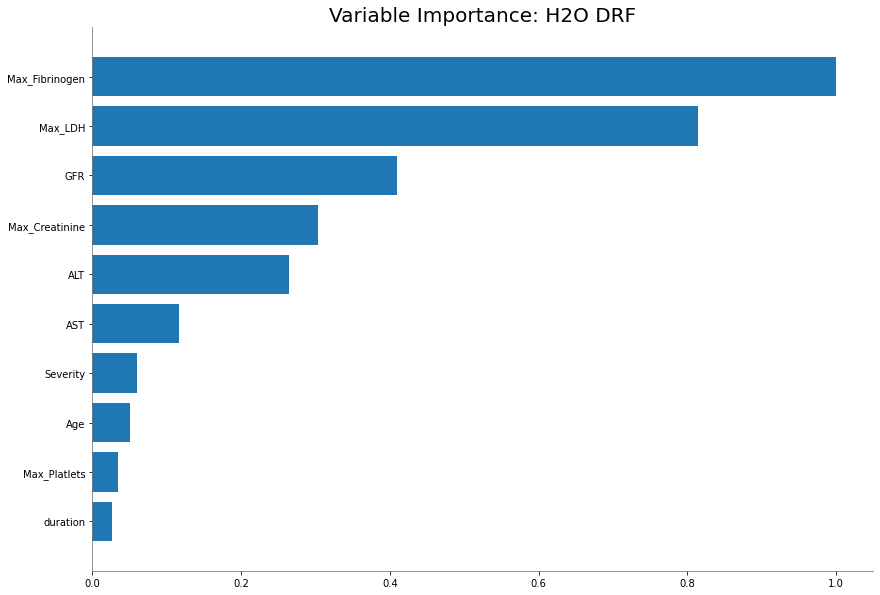

In [33]:
best_drf.varimp_plot()

In [26]:
drf= H2ORandomForestEstimator(
    ntrees = 10000,
    score_tree_interval = 10,
    seed = 12345,
    balance_classes = True)

drf.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
drf.model_performance(test)           

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [28]:
drf.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.09682554275173948
RMSE: 0.31116802977127883
LogLoss: 0.2974249391774627
Mean Per-Class Error: 0.09676016525331599
AUC: 0.9454953975501922
AUCPR: 0.8310482452532505
Gini: 0.8909907951003844

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11878404250649033: 


,,0,1,Error,Rate
0,0,196.0,23.0,0.105,(23.0/219.0)
1,1,6.0,57.0,0.0952,(6.0/63.0)
2,Total,202.0,80.0,0.1028,(29.0/282.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.118784,0.797203,79.0
1,max f2,0.106290,0.865672,82.0
2,max f0point5,0.225926,0.808581,59.0
3,max accuracy,0.225926,0.911348,59.0
4,max precision,0.985139,1.000000,0.0
5,max recall,0.008626,1.000000,194.0
6,max specificity,0.985139,1.000000,0.0
7,max absolute_mcc,0.225926,0.740462,59.0
8,max min_per_class_accuracy,0.118784,0.894977,79.0
9,max mean_per_class_accuracy,0.106290,0.903240,82.0



Gains/Lift Table: Avg response rate: 22.34 %, avg score: 14.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010638,0.967026,4.476190,4.476190,1.000000,0.982165,1.000000,0.982165,0.047619,0.047619,347.619048,347.619048,0.047619
1,2,0.021277,0.929429,4.476190,4.476190,1.000000,0.958692,1.000000,0.970429,0.047619,0.095238,347.619048,347.619048,0.095238
2,3,0.031915,0.821512,2.984127,3.978836,0.666667,0.868529,0.888889,0.936462,0.031746,0.126984,198.412698,297.883598,0.122418
3,4,0.042553,0.754219,4.476190,4.103175,1.000000,0.777744,0.916667,0.896783,0.047619,0.174603,347.619048,310.317460,0.170037
4,5,0.053191,0.691419,2.984127,3.879365,0.666667,0.716610,0.866667,0.860748,0.031746,0.206349,198.412698,287.936508,0.197217
5,6,0.102837,0.479589,4.156463,4.013136,0.928571,0.572324,0.896552,0.721509,0.206349,0.412698,315.646259,301.313629,0.399000
6,7,0.152482,0.348056,3.836735,3.955703,0.857143,0.389465,0.883721,0.613401,0.190476,0.603175,283.673469,295.570321,0.580344
7,8,0.202128,0.246383,2.557823,3.612364,0.571429,0.303615,0.807018,0.537314,0.126984,0.730159,155.782313,261.236424,0.679930
8,9,0.301418,0.103997,1.918367,3.054342,0.428571,0.163129,0.682353,0.414053,0.190476,0.920635,91.836735,205.434174,0.797347
9,10,0.400709,0.053397,0.159864,2.337126,0.035714,0.077216,0.522124,0.330589,0.015873,0.936508,-84.013605,133.712600,0.689933


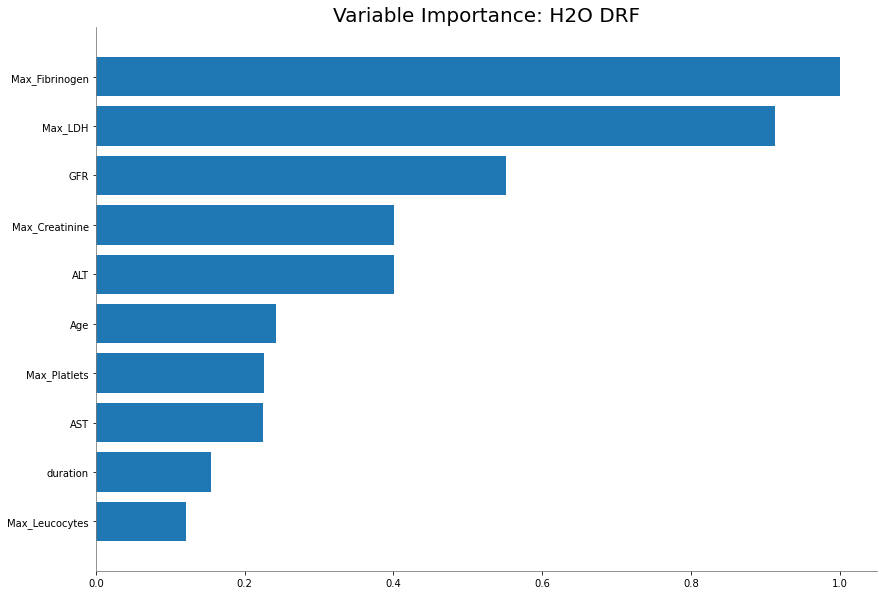

In [32]:
drf.varimp_plot()